#**INSTALACIÓN DE LOS PAQUETES NECESARIOS**

In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.4.tar.gz (199 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669443 sha256=91314b4848b933c37db1e32a1a1a8c9e9151f82129bfb5cd70c0245518d1ed6f
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import math as math
import netCDF4 as cdf
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature 
import xarray as xr
import numpy.ma as ma

In [ ]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega4
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega4
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega4


#**APERTURA DE LOS ARCHIVOS**

##**Libro de Estaciones**

In [ ]:
df_stations = pd.read_excel('Libro_estaciones.xlsx')
df_stations

,Codigo,Estacion,lat,lon,Municipio,Identificador,Departamento,Id,Contador,Unnamed: 9
0,23215030,AGUAS CLARAS [23215030],8.228889,-73.602778,Aguachica,0,Cesar,NaN,Cauca,1.0
1,23155040,CENTRO EL [23155040],6.859556,-73.765083,Barrancabermeja,0,Santander,NaN,NaN,NaN
2,21205710,JARDIN BOTANICO - AUT [21205710],4.669333,-74.102667,Bogota,0,Cundinamarca,NaN,NaN,NaN
3,23195040,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],7.144722,-73.122222,Bucaramanga,0,Santander,NaN,NaN,NaN
4,27045020,CASERI [27045020],7.811722,-74.935972,Cucasia,0,Cauca,NaN,NaN,NaN
5,16015040,SANTA ISABEL [16015040],8.233333,-72.433333,Cucuta,0,Norte_de_Santander,NaN,NaN,NaN
6,21205420,TIBAITATA [21205420],4.691417,-74.209000,Mosquera,0,Cundinamarca,NaN,NaN,NaN
7,21135050,JULIA LA [21135050],3.098778,-75.530028,Neiva,0,Huila,NaN,NaN,NaN
8,52055210,BOTANA - AUT [52055210],1.160000,-77.278806,Pasto,0,Nariño,NaN,NaN,NaN
9,23095010,AEROPUERTO PUERTO BERRIO [23095010],6.465000,-74.412222,Puerto_Berrio,0,Antioquia,NaN,NaN,NaN


In [ ]:
#Definición del DF para cada Región Natural:
#Región Andina
andina = df_stations.loc[df_stations['Identificador']==0]
lat_andina,lon_andina = andina['lat'],andina['lon']
#Región Amazonía
amazonia = df_stations.loc[df_stations['Identificador']==1]
lat_amazonia,lon_amazonia = amazonia['lat'],amazonia['lon']
#Región Pacífica
pacifica = df_stations.loc[df_stations['Identificador']==2]
lat_pacifica,lon_pacifica = pacifica['lat'],pacifica['lon']
#Región Caribe
caribe = df_stations.loc[df_stations['Identificador']==3]
lat_caribe,lon_caribe = caribe['lat'],caribe['lon']
#Región Orinoquía
orinoquia = df_stations.loc[df_stations['Identificador']==4]
lat_orinoquia,lon_orinoquia = orinoquia['lat'],orinoquia['lon']
#Región Insular
insular = df_stations.loc[df_stations['Identificador']==5]
lat_insular,lon_insular = insular['lat'],insular['lon']

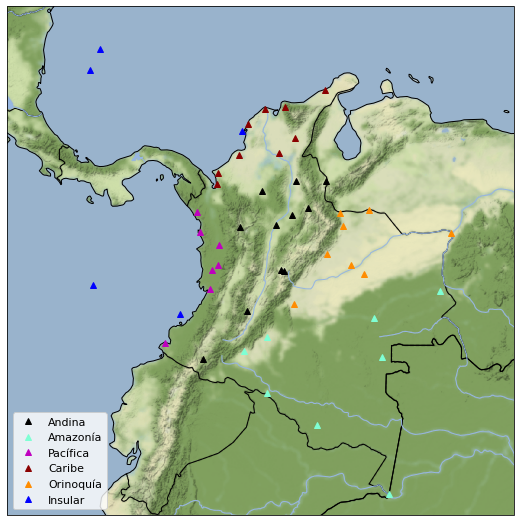

In [ ]:
# descargar topografía y fronteras
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_image(tiler,6)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)

#Andina
ax.plot(lon_andina,lat_andina,'^',color='k',label='Andina',transform=ccrs.Geodetic())
#Amazonía
ax.plot(lon_amazonia,lat_amazonia,'^',color='aquamarine',label='Amazonía',transform=ccrs.Geodetic())
#Pacífica
ax.plot(lon_pacifica,lat_pacifica,'^',color='m',label='Pacífica',transform=ccrs.Geodetic())
#Caribe
ax.plot(lon_caribe,lat_caribe,'^',color='darkred',label='Caribe',transform=ccrs.Geodetic())
#Orinoquía
ax.plot(lon_orinoquia,lat_orinoquia,'^',color='darkorange',label='Orinoquía',transform=ccrs.Geodetic())
#Insular
ax.plot(lon_insular,lat_insular,'^',color='blue',label='Insular',transform=ccrs.Geodetic())
plt.legend(loc=3, prop={'size': 11})
plt.show()

In [ ]:
nc1 = cdf.Dataset('ttotal_1.nc')
nc2 = cdf.Dataset('ttotal_2.nc')
nc3 = cdf.Dataset('ttotal_3.nc')

In [ ]:
#Impresión de los datos:
lats1 = nc1.variables['latitude'][:]
lons1 = nc1.variables['longitude'][:]
time1 = nc1.variables['time'][:]
values1 = nc1.variables['t2m'][:55000]
values2 = nc1.variables['t2m'][55000:]
print(np.shape(lats1))
print(np.shape(lons1))
print(np.shape(time1))
print(np.shape(values1))
print(np.shape(values2))
#--2
#--3
#Impresión de los datos:
lats3 = nc2.variables['latitude'][:]
lons3 = nc2.variables['longitude'][:]
time3 = nc2.variables['time'][:]
values3 = nc2.variables['t2m'][:55000]
values4 = nc2.variables['t2m'][55000:]
print(np.shape(lats3))
print(np.shape(lons3))
print(np.shape(time3))
print(np.shape(values3))
print(np.shape(values4))
#--4
#Impresión de los datos:
lats5 = nc3.variables['latitude'][:]
lons5 = nc3.variables['longitude'][:]
time5 = nc3.variables['time'][:]
values5 = nc3.variables['t2m'][:]
print(np.shape(lats5))
print(np.shape(lons5))
print(np.shape(time5))
print(np.shape(values5))
#--5


(81,)
(81,)
(113952,)
(55000, 81, 81)
(58952, 81, 81)
(81,)
(81,)
(113952,)
(55000, 81, 81)
(58952, 81, 81)
(81,)
(81,)
(35064,)
(35064, 81, 81)


In [ ]:
NC_Estaciones1 = {'Latitud':lats1,'Longitud':lons1,'Tiempo':time1}
NC_Estaciones1

NC_Estaciones2 = {'Latitud':lats3,'Longitud':lons3,'Tiempo':time3}
NC_Estaciones2

NC_Estaciones3 = {'Latitud':lats5,'Longitud':lons5,'Tiempo':time5}
NC_Estaciones3


{'Latitud': masked_array(data=[15.  , 14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25,
                    13.  , 12.75, 12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25,
                    11.  , 10.75, 10.5 , 10.25, 10.  ,  9.75,  9.5 ,  9.25,
                     9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,  7.5 ,  7.25,
                     7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,
                     5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,
                     3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,
                     1.  ,  0.75,  0.5 ,  0.25,  0.  , -0.25, -0.5 , -0.75,
                    -1.  , -1.25, -1.5 , -1.75, -2.  , -2.25, -2.5 , -2.75,
                    -3.  , -3.25, -3.5 , -3.75, -4.  , -4.25, -4.5 , -4.75,
                    -5.  ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 'Longitud': masked_array(data=[-85.  , -84.75, -84.5 , -84.25, -84.  , -83.75, -83.5 ,
                    -83.25, -83.

In [ ]:
time1 = NC_Estaciones1['Tiempo'][:]
time3 = NC_Estaciones2['Tiempo'][:]
time5 = NC_Estaciones3['Tiempo'][:]
print(np.shape(time1))
print(np.shape(time3))
print(np.shape(time5))
time = []
for i in range(0,3):
  if i == 0:
    for j in time1:
      time.append(j)
  elif i == 1:
    for j in time3:
      time.append(j)
  elif i == 2:
    for j in time5:
      time.append(j)
print(np.shape(time))

(113952,)
(113952,)
(35064,)
(262968,)


In [ ]:
#Hallar el punto más cercano:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#**OBTENCIÓN DE LAS POSICIONES**#

In [ ]:
lats_stations = []
lons_stations = []
for station in df_stations['lat']:
  Elat = station
  lats_stations.append(find_nearest(lats1,Elat))
for station in df_stations['lon']:
  Elon = station
  lons_stations.append(find_nearest(lons1,Elon))
np.array(lats_stations)
np.array(lons_stations)
#-
print(lats_stations)
print(lons_stations)

[8.25, 6.75, 4.75, 7.25, 7.75, 8.25, 4.75, 3.0, 1.25, 6.5, 6.5, 1.5, 3.75, -1.5, -4.25, 1.25, -0.25, 2.75, 2.0, 6.25, 4.0, 4.75, 5.0, 5.75, 7.0, 1.75, 11.0, 10.5, 9.25, 11.75, 8.5, 9.25, 11.0, 8.0, 10.0, 7.0, 4.5, 3.25, 5.0, 6.25, 7.0, 6.5, 5.25, 3.0, 10.25, 4.0, 12.5, 13.25]
[-73.5, -73.75, -74.0, -73.0, -75.0, -72.5, -74.25, -75.5, -77.25, -74.5, -75.75, -75.75, -68.0, -72.75, -70.0, -70.25, -74.75, -70.5, -74.75, -77.5, -77.0, -77.0, -76.75, -76.75, -77.5, -78.75, -74.75, -75.5, -75.75, -72.5, -76.75, -74.25, -74.0, -76.75, -73.75, -70.75, -71.0, -73.75, -71.5, -67.5, -72.0, -71.75, -72.5, -78.25, -75.75, -81.5, -81.75, -81.25]


In [ ]:
Estaciones = {'Lats':lats_stations,'Lons':lons_stations,'Estacion':df_stations['Estacion'],'Municipio':df_stations['Municipio']}
Estaciones

{'Lats': [8.25,
  6.75,
  4.75,
  7.25,
  7.75,
  8.25,
  4.75,
  3.0,
  1.25,
  6.5,
  6.5,
  1.5,
  3.75,
  -1.5,
  -4.25,
  1.25,
  -0.25,
  2.75,
  2.0,
  6.25,
  4.0,
  4.75,
  5.0,
  5.75,
  7.0,
  1.75,
  11.0,
  10.5,
  9.25,
  11.75,
  8.5,
  9.25,
  11.0,
  8.0,
  10.0,
  7.0,
  4.5,
  3.25,
  5.0,
  6.25,
  7.0,
  6.5,
  5.25,
  3.0,
  10.25,
  4.0,
  12.5,
  13.25],
 'Lons': [-73.5,
  -73.75,
  -74.0,
  -73.0,
  -75.0,
  -72.5,
  -74.25,
  -75.5,
  -77.25,
  -74.5,
  -75.75,
  -75.75,
  -68.0,
  -72.75,
  -70.0,
  -70.25,
  -74.75,
  -70.5,
  -74.75,
  -77.5,
  -77.0,
  -77.0,
  -76.75,
  -76.75,
  -77.5,
  -78.75,
  -74.75,
  -75.5,
  -75.75,
  -72.5,
  -76.75,
  -74.25,
  -74.0,
  -76.75,
  -73.75,
  -70.75,
  -71.0,
  -73.75,
  -71.5,
  -67.5,
  -72.0,
  -71.75,
  -72.5,
  -78.25,
  -75.75,
  -81.5,
  -81.75,
  -81.25],
 'Estacion': 0                         AGUAS CLARAS [23215030]
 1                            CENTRO EL [23155040]
 2               JARDIN BOTANICO  - AUT

In [ ]:
total = len(df_stations['Estacion'])
print(total)
pos = 0
#Latitudes:
pos_lats = []
for i in np.arange(0,total):
  value_lat = Estaciones['Lats'][i]
  for j in NC_Estaciones1['Latitud']:
    pos = pos+1
    if j == value_lat:
      break
  pos_lats.append(pos-1)  
  pos = 0

#Longitudes:
pos_lons = []
for i in np.arange(0,total):
  value_lon = Estaciones['Lons'][i]
  for j in NC_Estaciones1['Longitud']:
    pos = pos+1
    if j == value_lon:
      break
  pos_lons.append(pos-1)
  pos = 0

48


#**POSICIONES PARA LEER**

In [ ]:
posiciones = {'Estacion':df_stations['Estacion'],'Municipio':df_stations['Municipio'],'pos_lat':pos_lats,'pos_lon':pos_lons}
posiciones = pd.DataFrame(posiciones)
posiciones

,Estacion,Municipio,pos_lat,pos_lon
0,AGUAS CLARAS [23215030],Aguachica,27,46
1,CENTRO EL [23155040],Barrancabermeja,33,45
2,JARDIN BOTANICO - AUT [21205710],Bogota,41,44
3,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],Bucaramanga,31,48
4,CASERI [27045020],Cucasia,29,40
5,SANTA ISABEL [16015040],Cucuta,27,50
6,TIBAITATA [21205420],Mosquera,41,43
7,JULIA LA [21135050],Neiva,48,38
8,BOTANA - AUT [52055210],Pasto,55,31
9,AEROPUERTO PUERTO BERRIO [23095010],Puerto_Berrio,34,42


#**ESTACIONES**

In [ ]:
#Def para obtención de los valores:
def obtener_valores (posicion):
  valores = []
  #--1
  valores1 = ma.getdata(values1[:,posiciones['pos_lat'][posicion],posiciones['pos_lon'][posicion]])
  for j in valores1:
    valores.append(j)
  #--2
  valores2 = ma.getdata(values2[:,posiciones['pos_lat'][posicion],posiciones['pos_lon'][posicion]])
  for j in valores2:
    valores.append(j)
  #--3
  valores3 = ma.getdata(values3[:,posiciones['pos_lat'][posicion],posiciones['pos_lon'][posicion]])
  for j in valores3:
    valores.append(j)
  #--4
  valores4 = ma.getdata(values4[:,posiciones['pos_lat'][posicion],posiciones['pos_lon'][posicion]])
  for j in valores4:
    valores.append(j) 
  #--5
  valores5 = ma.getdata(values5[:,posiciones['pos_lat'][posicion],posiciones['pos_lon'][posicion]])
  for j in valores5:
    valores.append(j)
  return valores

In [ ]:
for i in range(0,48):
  #Estación [0] : AGUAS CLARAS [23215030]
  if i == 0:
    l0 = []
    for val in obtener_valores(i):
      l0.append(val)
  #Estación [1] : CENTRO EL [23155040]
  elif i == 1:
    l1 = []
    for val in obtener_valores(i):
      l1.append(val)
  #Estación [2] : JARDIN BOTANICO - AUT [21205710]
  elif i == 2:
    l2 = []
    for val in obtener_valores(i):
      l2.append(val)
  #Estación [3] : UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]
  elif i == 3:
    l3 = []
    for val in obtener_valores(i):
      l3.append(val)
  #Estación [4] : CASERI [27045020]
  elif i == 4:
    l4 = []
    for val in obtener_valores(i):
      l4.append(val)
  #Estación [5] : SANTA ISABEL [16015040]
  elif i == 5:
    l5 = []
    for val in obtener_valores(i):
      l5.append(val)
  #Estación [6] : TIBAITATA [21205420] 	
  elif i == 6:
    l6 = []
    for val in obtener_valores(i):
      l6.append(val)
  #Estación [7] : JULIA LA [21135050]
  elif i == 7:
    l7 = []
    for val in obtener_valores(i):
      l7.append(val)
  #Estación [8] : BOTANA - AUT [52055210] 	
  elif i == 8:
    l8 = []
    for val in obtener_valores(i):
      l8.append(val)
  #Estación [9] : AEROPUERTO PUERTO BERRIO [23095010]
  elif i == 9:
    l9 = []
    for val in obtener_valores(i):
      l9.append(val)
  #Estación [10] : CANAFISANTO [26215020] 
  elif i == 10:
    l10 = []
    for val in obtener_valores(i):
      l10.append(val)
  #Estación [11] : MACAGUAL [44035030]
  elif i == 11:
    l11 = []
    for val in obtener_valores(i):
      l11.append(val)
  #Estación [12] : PUERTO INIRIDA - AUT [31095030]	
  elif i == 12:
    l12 = []
    for val in obtener_valores(i):
      l12.append(val)
  #Estación [13] : LA CHORRERA [47075010]
  elif i == 13:
    l13 = []
    for val in obtener_valores(i):
      l13.append(val)
  #Estación [14] : AEROPUERTO VASQUEZ COBO [48015050]
  elif i == 14:
    l14 = []
    for val in obtener_valores(i):
      l14.append(val)
  #Estación [15] : MITU [42075010]
  elif i == 15:
    l15 = []
    for val in obtener_valores(i):
      l15.append(val)
  #Estación [16] : PUERTO LEGUIZAMO [47045010]
  elif i == 16:
    l16 = []
    for val in obtener_valores(i):
      l16.append(val)
  #Estación [17] : MAPIRIPANA [32155010]
  elif i == 17:
    l17 = []
    for val in obtener_valores(i):
      l17.append(val)
  #Estación [18] : SAN VICENTE DEL CAGUAN - AUT [46015030
  elif i == 18:
    l18 = []
    for val in obtener_valores(i):
      l18.append(val)
  #Estación [19] : PANAMERICANA [56015010]
  elif i == 19:
    l19 = []
    for val in obtener_valores(i):
      l19.append(val)
  #Estación [20] : BAJO CALIMA [54075020]
  elif i == 20:
    l20 = []
    for val in obtener_valores(i):
      l20.append(val)
  #Estación [21] : NOANAMA [54085010]
  elif i == 21:
    l21 = []
    for val in obtener_valores(i):
      l21.append(val)
  #Estación [22] : SAN JOSE PALMAR [54025010]
  elif i == 22:
    l22 = []
    for val in obtener_valores(i):
      l22.append(val)
  #Estación [23] : TERESITA LA [11125010] 
  elif i == 23:
    l23 = []
    for val in obtener_valores(i):
      l23.append(val)
  #Estación [24] : SAN JOSE PALMAR [54025010]
  elif i == 24:
    l24 = []
    for val in obtener_valores(i):
      l24.append(val)
  #Estación [25] : AEROPUERTO LA FLORIDA [51035010]
  elif i == 25:
    l25 = []
    for val in obtener_valores(i):
      l25.append(val)
  #Estación [26] : FLORES LAS [29045120] 	
  elif i == 26:
    l26 = []
    for val in obtener_valores(i):
      l26.append(val)
  #Estación [27] : ESCUELA NAVAL CIOH [14015030] 
  elif i == 27:
    l27 = []
    for val in obtener_valores(i):
      l27.append(val)
  #Estación [28] : LORICA ITA - AUT [13085050]
  elif i == 28:
    l28 = []
    for val in obtener_valores(i):
      l28.append(val)
  #Estación [29] : MANAURE [15075030]	
  elif i == 29:
    l29 = []
    for val in obtener_valores(i):
      l29.append(val)
  #Estación [30] : MELLITO EL [12025030] 
  elif i == 30:
    l30 = []
    for val in obtener_valores(i):
      l30.append(val)
  #Estación [31] :LOS ALAMOS - AUT [25025002]
  elif i == 31:
    l31 = []
    for val in obtener_valores(i):
      l31.append(val)
  #Estación [32] : SAN LORENZO - AUT [15015060] 	
  elif i == 32:
    l32 = []
    for val in obtener_valores(i):
      l32.append(val)
  #Estación [33] : TURBO - AUT [12025040]
  elif i == 33:
    l33 = []
    for val in obtener_valores(i):
      l33.append(val)
  #Estación [34] : GUAYMARAL [28035040]
  elif i == 34:
    l34 = []
    for val in obtener_valores(i):
      l34.append(val)
  #Estación [35] : AEROPUERTO SANTIAGO PÃ‰REZ [37055010]
  elif i == 35:
    l35 = []
    for val in obtener_valores(i):
      l35.append(val)
  #Estación [36] : LAS GAVIOTAS [34015010]
  elif i == 36:
    l36 = []
    for val in obtener_valores(i):
      l36.append(val)
  #Estación [37] : COOPERATIVA LA [32075060]
  elif i == 37:
    l37 = []
    for val in obtener_valores(i):
      l37.append(val)
  #Estación [38] : MODULOS - AUT [35225030] 
  elif i == 38:
    l38 = []
    for val in obtener_valores(i):
      l38.append(val)
  #Estación [39] : AEROPUERTO PUERTO CARRENO [38015030] 
  elif i == 39:
    l39 = []
    for val in obtener_valores(i):
      l39.append(val)
  #Estación [40] : SARAVENA - AUT [37045010] 	
  elif i == 40:
    l40 = []
    for val in obtener_valores(i):
      l40.append(val)
  #Estación [41] : TAME [36025010]	
  elif i == 41:
    l41 = []
    for val in obtener_valores(i):
      l41.append(val)
  #Estación [42] : AEROPUERTO YOPAL - AUT [35215020]
  elif i == 42:
    l42 = []
    for val in obtener_valores(i):
      l42.append(val)
  #Estación [43] : GORGONA GUAPI [57025020]
  elif i == 43:
    l43 = []
    for val in obtener_valores(i):
      l43.append(val)
  #Estación [44] : ISLAS DEL ROSARIO [14015060]
  elif i == 44:
    l44 = []
    for val in obtener_valores(i):
      l44.append(val)
  #Estación [45] : MALPELO - AUT [57015010] 
  elif i == 45:
    l45 = []
    for val in obtener_valores(i):
      l45.append(val)
  #Estación [46] : AEROPUERTO SESQUICENTENARIO [17015010]
  elif i == 46:
    l46 = []
    for val in obtener_valores(i):
      l46.append(val)
  #Estación [47] :AEROPUERTO EL EMBRUJO [17025020]	
  elif i == 47:
    l47 = []
    for val in obtener_valores(i):
      l47.append(val)

In [ ]:
df0 = {'Tiempo':time, 'Valores':l0,'Estacion':'AGUAS CLARAS [23215030]'}
df0 = pd.DataFrame(df0)
df0

,Tiempo,Valores,Estacion
0,788928,295.431902,AGUAS CLARAS [23215030]
1,788929,294.828185,AGUAS CLARAS [23215030]
2,788930,294.119686,AGUAS CLARAS [23215030]
3,788931,294.023924,AGUAS CLARAS [23215030]
4,788932,293.669328,AGUAS CLARAS [23215030]
...,...,...,...
262963,1051891,295.733674,AGUAS CLARAS [23215030]
262964,1051892,296.982582,AGUAS CLARAS [23215030]
262965,1051893,297.899793,AGUAS CLARAS [23215030]
262966,1051894,297.390077,AGUAS CLARAS [23215030]


In [ ]:
df1 = {'Tiempo':time, 'Valores':l1,'Estacion':'EL CENTRO [23155040]'}
df1 = pd.DataFrame(df1)
df1

,Tiempo,Valores,Estacion
0,788928,296.725381,EL CENTRO [23155040]
1,788929,296.576187,EL CENTRO [23155040]
2,788930,296.514427,EL CENTRO [23155040]
3,788931,296.250735,EL CENTRO [23155040]
4,788932,296.096683,EL CENTRO [23155040]
...,...,...,...
262963,1051891,299.695968,EL CENTRO [23155040]
262964,1051892,299.543679,EL CENTRO [23155040]
262965,1051893,300.147967,EL CENTRO [23155040]
262966,1051894,298.206457,EL CENTRO [23155040]


In [ ]:
#DATAFRAMES:
#Estación[0] : AGUAS CLARAS [23215030]
df0 = {'Tiempo':time, 'Valores':l0,'Estacion':'AGUAS CLARAS [23215030]'}
df0 = pd.DataFrame(df0)
df0.to_excel('AguasClaras.xlsx')
#Estación[1] EL CENTRO [23155040]
df1 = {'Tiempo':time, 'Valores':l1,'Estacion':'EL CENTRO [23155040]'}
df1 = pd.DataFrame(df1)
df1.to_excel('ElCentro.xlsx')
#Estación[2] JARDIN BOTANICO - AUT [21205710]
df2 = {'Tiempo':time, 'Valores':l2,'Estacion':'JARDIN BOTANICO - AUT [21205710]'}
df2 = pd.DataFrame(df2)
df2.to_excel('JardinBotanico.xlsx')
#Estación[3] UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]
df3 = {'Tiempo':time, 'Valores':l3,'Estacion':'UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]'}
df3 = pd.DataFrame(df3)
df3.to_excel('UIS.xlsx')
#Estación[4] CASERI [27045020]
df4 = {'Tiempo':time, 'Valores':l4,'Estacion':'CASERI [27045020]'}
df4 = pd.DataFrame(df4)
df4.to_excel('Caseri.xlsx')
#Estación[5]  SANTA ISABEL [16015040]
df5 = {'Tiempo':time, 'Valores':l5,'Estacion':'SANTA ISABEL [16015040]'}
df5 = pd.DataFrame(df5)
df5.to_excel('SantaIsabel.xlsx')
#Estación[6] TIBAITATA [21205420]
df6 = {'Tiempo':time, 'Valores':l6,'Estacion':'TIBAITATA [21205420]'}
df6 = pd.DataFrame(df6)
df6.to_excel('Tibaitata.xlsx')
#Estación[7] 	JULIA LA [21135050]
df7 = {'Tiempo':time, 'Valores':l7,'Estacion':'JULIA LA [21135050]'}
df7 = pd.DataFrame(df7)
df7.to_excel('LaJulia.xlsx')
#Estación[8]  BOTANA - AUT [52055210] 	
df8 = {'Tiempo':time, 'Valores':l8,'Estacion':'BOTANA - AUT [52055210]'}
df8 = pd.DataFrame(df8)
df8.to_excel('Botana.xlsx')
#Estación[9] AEROPUERTO PUERTO BERRIO [23095010]
df9 = {'Tiempo':time, 'Valores':l9,'Estacion':'AEROPUERTO PUERTO BERRIO [23095010]'}
df9 = pd.DataFrame(df9)
df9.to_excel('APuertoBerrio.xlsx')
#Estación[10] CANAFISANTO [26215020]
df10 = {'Tiempo':time, 'Valores':l10,'Estacion':'CANAFISANTO [26215020]'}
df10 = pd.DataFrame(df10)
df10.to_excel('CANAFISANTO.xlsx')
#Estación[11] MACAGUAL [44035030]
df11 = {'Tiempo':time, 'Valores':l11,'Estacion':'MACAGUAL [44035030]'}
df11 = pd.DataFrame(df11)
df11.to_excel('MACAGUAL.xlsx')
#Estación[12] PUERTO INIRIDA - AUT [31095030]
df12 = {'Tiempo':time, 'Valores':l12,'Estacion':'PUERTO INIRIDA - AUT [31095030]'}
df12 = pd.DataFrame(df12)
df12.to_excel('PuertoInirida.xlsx')
#Estación[13]LA CHORRERA [47075010]
df13 = {'Tiempo':time, 'Valores':l13,'Estacion':'LA CHORRERA [47075010]'}
df13 = pd.DataFrame(df13)
df13.to_excel('LaChorrera.xlsx')
#Estación[14] AEROPUERTO VASQUEZ COBO [48015050]
df14 = {'Tiempo':time, 'Valores':l14,'Estacion':'AEROPUERTO VASQUEZ COBO [48015050]'}
df14 = pd.DataFrame(df14)
df14.to_excel('AVasquezCobo.xlsx')
#Estación[15] MITU [42075010]
df15 = {'Tiempo':time, 'Valores':l15,'Estacion':'MITU [42075010]'}
df15 = pd.DataFrame(df15)
df15.to_excel('MITU.xlsx')
#Estación[16] PUERTO LEGUIZAMO [47045010]
df16 = {'Tiempo':time, 'Valores':l16,'Estacion':'PUERTO LEGUIZAMO [47045010]'}
df16 = pd.DataFrame(df16)
df16.to_excel('PuertoLeguizamo.xlsx')
#Estación[17]  MAPIRIPANA [32155010]
df17 = {'Tiempo':time, 'Valores':l17,'Estacion':'MAPIRIPANA [32155010]'}
df17 = pd.DataFrame(df17)
df17.to_excel('MAPIRIPANA.xlsx')
#Estación[18] SAN VICENTE DEL CAGUAN - AUT [46015030]
df18 = {'Tiempo':time, 'Valores':l18,'Estacion':'SAN VICENTE DEL CAGUAN - AUT [46015030]'}
df18 = pd.DataFrame(df18)
df18.to_excel('SanVicenteCaguan.xlsx')
#Estación[19] PANAMERICANA [56015010]
df19 = {'Tiempo':time, 'Valores':l19,'Estacion':'PANAMERICANA [56015010]'}
df19 = pd.DataFrame(df19)
df19.to_excel('PANAMERICANA.xlsx')
#Estación[20] BAJO CALIMA [54075020]
df20 = {'Tiempo':time, 'Valores':l20,'Estacion':df_stations['Estacion'][20]}
df20 = pd.DataFrame(df20)
df20.to_excel('BajoCalima.xlsx')
#Estación[21] NOANAMA [54085010]
df21 = {'Tiempo':time, 'Valores':l21,'Estacion':df_stations['Estacion'][21]}
df21 = pd.DataFrame(df21)
df21.to_excel('Noanama.xlsx')
#Estación[22] SAN JOSE PALMAR [54025010]
df22 = {'Tiempo':time, 'Valores':l22,'Estacion':df_stations['Estacion'][22]}
df22 = pd.DataFrame(df22)
df22.to_excel('SanJosePalmar.xlsx')
#Estación[23] AEROPUERTO EL CARANO [11045010]
df23 = {'Tiempo':time, 'Valores':l23,'Estacion':df_stations['Estacion'][23]}
df23 = pd.DataFrame(df23)
df23.to_excel('AElCarnaro.xlsx')
#Estación[24] TERESITA LA [11125010] 	
df24 = {'Tiempo':time, 'Valores':l24,'Estacion':df_stations['Estacion'][24]}
df24 = pd.DataFrame(df24)
df24.to_excel('LaTeresita.xlsx')
#Estación[25] AEROPUERTO LA FLORIDA [51035010]
df25 = {'Tiempo':time, 'Valores':l25,'Estacion':df_stations['Estacion'][25]}
df25 = pd.DataFrame(df25)
df25.to_excel('ALaFlorida.xlsx')
#Estación[26] FLORES LAS [29045120]
df26 = {'Tiempo':time, 'Valores':l26,'Estacion':df_stations['Estacion'][26]}
df26 = pd.DataFrame(df26)
df26.to_excel('LasFlores.xlsx')
#Estación[27] ESCUELA NAVAL CIOH [14015030]
df27 = {'Tiempo':time, 'Valores':l27,'Estacion':df_stations['Estacion'][27]}
df27 = pd.DataFrame(df27)
df27.to_excel('EscuelaCIOH.xlsx')
#Estación[28] LORICA ITA - AUT [13085050] 	
df28 = {'Tiempo':time, 'Valores':l28,'Estacion':df_stations['Estacion'][28]}
df28 = pd.DataFrame(df28)
df28.to_excel('LORICA.xlsx')
#Estación[29] MANAURE [15075030]
df29 = {'Tiempo':time, 'Valores':l29,'Estacion':df_stations['Estacion'][29]}
df29 = pd.DataFrame(df29)
df29.to_excel('MANAURE.xlsx')
#Estación[30] MELLITO EL [12025030] 	
df30 = {'Tiempo':time, 'Valores':l30,'Estacion':df_stations['Estacion'][30]}
df30 = pd.DataFrame(df30)
df30.to_excel('ElMellito.xlsx')
#Estación[31] LOS ALAMOS - AUT [25025002]
df31 = {'Tiempo':time, 'Valores':l31,'Estacion':df_stations['Estacion'][31]}
df31 = pd.DataFrame(df31)
df31.to_excel('LosAlamos.xlsx')
#Estación[32]  SAN LORENZO - AUT [15015060]	
df32 = {'Tiempo':time, 'Valores':l32,'Estacion':df_stations['Estacion'][32]}
df32 = pd.DataFrame(df32)
df32.to_excel('SanLorenzo.xlsx')
#Estación[33] TURBO - AUT [12025040] 
df33 = {'Tiempo':time, 'Valores':l33,'Estacion':df_stations['Estacion'][33]}
df33 = pd.DataFrame(df33)
df33.to_excel('TURBO.xlsx')
#Estación[34] GUAYMARAL [28035040] 	
df34 = {'Tiempo':time, 'Valores':l34,'Estacion':df_stations['Estacion'][34]}
df34 = pd.DataFrame(df34)
df34.to_excel('GUAYMARAL.xlsx')
#Estación[35]  AEROPUERTO SANTIAGO PÃ‰REZ [37055010]
df35 = {'Tiempo':time, 'Valores':l35,'Estacion':df_stations['Estacion'][35]}
df35 = pd.DataFrame(df35)
df35.to_excel('ASantiagoPerez.xlsx')
#Estación[36] LAS GAVIOTAS [34015010] 	
df36 = {'Tiempo':time, 'Valores':l36,'Estacion':df_stations['Estacion'][36]}
df36 = pd.DataFrame(df36)
df36.to_excel('LasGaviotas.xlsx')
#Estación[37] COOPERATIVA LA [32075060] 	
df37 = {'Tiempo':time, 'Valores':l37,'Estacion':df_stations['Estacion'][37]}
df37 = pd.DataFrame(df37)
df37.to_excel('LaCooperativa.xlsx')
#Estación[38]  MODULOS - AUT [35225030] 	
df38 = {'Tiempo':time, 'Valores':l38,'Estacion':df_stations['Estacion'][38]}
df38 = pd.DataFrame(df38)
df38.to_excel('MODULOS.xlsx')
#Estación[39] AEROPUERTO PUERTO CARRENO [38015030]
df39 = {'Tiempo':time, 'Valores':l39,'Estacion':df_stations['Estacion'][39]}
df39 = pd.DataFrame(df39)
df39.to_excel('APuertoCarreno.xlsx')
#Estación[40] SARAVENA - AUT [37045010]
df40 = {'Tiempo':time, 'Valores':l40,'Estacion':df_stations['Estacion'][40]}
df40 = pd.DataFrame(df40)
df40.to_excel('SARAVENA.xlsx')
#Estación[41] TAME [36025010] 	
df41 = {'Tiempo':time, 'Valores':l41,'Estacion':df_stations['Estacion'][41]}
df41 = pd.DataFrame(df41)
df41.to_excel('TAME.xlsx')
#Estación[42] AEROPUERTO YOPAL - AUT [35215020] 	
df42 = {'Tiempo':time, 'Valores':l42,'Estacion':df_stations['Estacion'][42]}
df42 = pd.DataFrame(df42)
df42.to_excel('AYopal.xlsx')
#Estación[43] GORGONA GUAPI [57025020] 	
df43 = {'Tiempo':time, 'Valores':l43,'Estacion':df_stations['Estacion'][43]}
df43 = pd.DataFrame(df43)
df43.to_excel('Gorgona.xlsx')
#Estación[44] ISLAS DEL ROSARIO [14015060] 	
df44 = {'Tiempo':time, 'Valores':l44,'Estacion':df_stations['Estacion'][44]}
df44 = pd.DataFrame(df44)
df44.to_excel('IslasdelRosario.xlsx')
#Estación[45] MALPELO - AUT [57015010]
df45 = {'Tiempo':time, 'Valores':l45,'Estacion':df_stations['Estacion'][45]}
df45 = pd.DataFrame(df45)
df45.to_excel('MALPELO.xlsx')
#Estación[46] AEROPUERTO SESQUICENTENARIO [17015010]
df46 = {'Tiempo':time, 'Valores':l46,'Estacion':df_stations['Estacion'][46]}
df46 = pd.DataFrame(df46)
df46.to_excel('ASesquicentenario.xlsx')
#Estación[47] AEROPUERTO EL EMBRUJO [17025020]
df47 = {'Tiempo':time, 'Valores':l47,'Estacion':df_stations['Estacion'][47]}
df47 = pd.DataFrame(df47)
df47.to_excel('AElEmbrujo.xlsx')